# This notebook shows the tensor sizes for our VAE

In [8]:
import numpy as np
import tensorflow as tf

tfd = tf.contrib.distributions
tfn = tf.contrib.rnn
tfl = tf.linalg
dynrnn = tf.nn.dynamic_rnn
bidynrnn = tf.nn.bidirectional_dynamic_rnn
# import sys
# sys.path.insert(0, '/project/code_repository')
#from covariant_VAE import covariant_VAE
#from data_processing import get_complementary_batch
#from plotting import plotting

# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets('MNIST_data/')

In [7]:
!pip install --upgrade tensorflow

Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 55.5MB 28kB/s eta 0:00:013
    100% |████████████████████████████████| 51kB 4.1MB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 1.9MB 627kB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 92kB 3.8MB/s ta 0:00:011
    100% |████████████████████████████████| 4.7MB 301kB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 573kB 1.4MB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 3.3MB 385kB/s ta 0:00:011
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 1.2MB 837kB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization fa

In [ ]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#from IPython.display import display
#import umap

In [8]:
batch_size = 11
code_size = 500

## Dense encoder

In [3]:
tf.reset_default_graph()        

x_in = tf.constant(0.1, shape=[batch_size, 28, 28])
h0 = tf.layers.flatten(x_in)
h1 = tf.layers.dense(h0, 200)
h2 = tf.layers.dense(h1, 100)
loc = tf.layers.dense(h2, code_size)
scale = tf.layers.dense(h2, code_size)

# Print the total number of parameters of the model
n_params = np.sum([np.prod(v.get_shape().as_list()) for v in tf.trainable_variables()])
print('Built VAE using a total of {:,} parameters'.format(n_params))

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(x_in).shape)
print(sess.run(h0).shape)
print(sess.run(h1).shape)
print(sess.run(h2).shape)
print(sess.run(loc).shape)
print(sess.run(scale).shape)

Built VAE using a total of 181,140 parameters
(11, 28, 28)
(11, 784)
(11, 200)
(11, 100)
(11, 20)
(11, 20)


## Dense decoder

In [4]:
tf.reset_default_graph()        

code = tf.constant(0.1, shape=[batch_size, code_size])
h1 = tf.layers.dense(code, 100)
h2 = tf.layers.dense(h1, 200)
h3 = tf.layers.dense(h2, 784)
logit = tf.reshape(h3, [-1] + [28,28])

# Print the total number of parameters of the model
n_params = np.sum([np.prod(v.get_shape().as_list()) for v in tf.trainable_variables()])
print('Built VAE using a total of {:,} parameters'.format(n_params))

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(code).shape)
print(sess.run(h1).shape)
print(sess.run(h2).shape)
print(sess.run(h3).shape)
print(sess.run(logit).shape)

Built VAE using a total of 179,884 parameters
(11, 20)
(11, 100)
(11, 200)
(11, 784)
(11, 28, 28)


## CNN encoder

In [3]:
code_size = 512
batch_size = 200

In [9]:
help(tfn.ConvLSTMCell)

Help on class ConvLSTMCell in module tensorflow.contrib.rnn.python.ops.rnn_cell:

class ConvLSTMCell(tensorflow.python.ops.rnn_cell_impl.RNNCell)
 |  Convolutional LSTM recurrent network cell.
 |  
 |  https://arxiv.org/pdf/1506.04214v1.pdf
 |  
 |  Method resolution order:
 |      ConvLSTMCell
 |      tensorflow.python.ops.rnn_cell_impl.RNNCell
 |      tensorflow.python.layers.base.Layer
 |      tensorflow.python.training.checkpointable.CheckpointableBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, conv_ndims, input_shape, output_channels, kernel_shape, use_bias=True, skip_connection=False, forget_bias=1.0, initializers=None, name='conv_lstm_cell')
 |      Construct ConvLSTMCell.
 |      Args:
 |        conv_ndims: Convolution dimensionality (1, 2 or 3).
 |        input_shape: Shape of the input as int tuple, excluding the batch size.
 |        output_channels: int, number of output channels of the conv LSTM.
 |        kernel_shape: Shape of kernel a

In [ ]:
cell_1 = tfn.Conv2DLSTMCell()

In [42]:
tf.reset_default_graph()        

x_in = tf.constant(0.1, shape=[batch_size, 30, 30])
h0 = tf.expand_dims(x_in, -1)
h1 = tf.layers.conv2d(h0, 8, (5,5), strides=(1,1), padding='VALID')
h2 = tf.layers.conv2d(h1, 16, (5,5), strides=(2,2), padding='SAME')
h3 = tf.layers.conv2d(h2, 32, (5,5), strides=(2,2), padding='SAME')
h4 = tf.layers.conv2d(h3, 64, (5,5), strides=(2,2), padding='SAME')
h5 = tf.layers.conv2d(h4, 64, (5,5), strides=(2,2), padding='SAME')
h6 = tf.layers.flatten(h5)
# h7 = tf.layers.dense(h6, 128)
loc = tf.layers.dense(h6, code_size)
scale = tf.layers.dense(h6, code_size)

# Print the total number of parameters of the model
n_params = np.sum([np.prod(v.get_shape().as_list()) for v in tf.trainable_variables()])
print('Built VAE using a total of {:,} parameters'.format(n_params))

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(x_in).shape)
print(sess.run(h0).shape)
print(sess.run(h1).shape)
print(sess.run(h2).shape)
print(sess.run(h3).shape)
print(sess.run(h4).shape)
print(sess.run(h5).shape)
print(sess.run(h6).shape)
# print(sess.run(h7).shape)
print(sess.run(loc).shape)
print(sess.run(scale).shape)

Built VAE using a total of 301,568 parameters
(200, 30, 30)
(200, 30, 30, 1)
(200, 26, 26, 8)
(200, 13, 13, 16)
(200, 7, 7, 32)
(200, 4, 4, 64)
(200, 2, 2, 64)
(200, 256)
(200, 256)
(200, 256)


## CNN decoder

In [49]:
tf.reset_default_graph()        

code = tf.constant(0.1, shape=[batch_size, code_size])
h1 = tf.layers.dense(code, 256)
h2 = tf.reshape(h1, shape=[-1]+[2,2,64])
h3 = tf.layers.conv2d_transpose(h2, 64, (5,5), strides=(2,2), padding='SAME')
h4 = tf.layers.conv2d_transpose(h3, 32, (5,5), strides=(2,2), padding='SAME')
h5 = tf.layers.conv2d_transpose(h4, 16, (5,5), strides=(2,2), padding='SAME')
h6 = tf.layers.conv2d_transpose(h5, 8, (5,5), strides=(2,2), padding='SAME')
h7_mean = tf.layers.conv2d(h6, 1, (3,3), strides=(1,1), padding='VALID')
h7_cov = tf.layers.conv2d(h6, 1, (3,3), strides=(1,1), padding='VALID')
h8 = tf.layers.flatten(h7_mean)

# Print the total number of parameters of the model
n_params = np.sum([np.prod(v.get_shape().as_list()) for v in tf.trainable_variables()])
print('Built VAE using a total of {:,} parameters'.format(n_params))

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(code).shape)
print(sess.run(h1).shape)
print(sess.run(h2).shape)
print(sess.run(h3).shape)
print(sess.run(h4).shape)
print(sess.run(h5).shape)
print(sess.run(h6).shape)
print(sess.run(h7_mean).shape)
print(sess.run(h7_cov).shape)
print(sess.run(h8).shape)

Built VAE using a total of 235,658 parameters
(200, 256)
(200, 256)
(200, 2, 2, 64)
(200, 4, 4, 64)
(200, 8, 8, 32)
(200, 16, 16, 16)
(200, 32, 32, 8)
(200, 30, 30, 1)
(200, 30, 30, 1)
(200, 900)


In [34]:
tf.reset_default_graph()        

code = tf.constant(0.1, shape=[batch_size, code_size])
h1 = tf.layers.dense(code, 128)
h2 = tf.reshape(h1, shape=[-1]+[2,2,32])
h3 = tf.layers.conv2d_transpose(h2, 64, (5,5), strides=(2,2), padding='SAME')
h4 = tf.layers.conv2d_transpose(h3, 32, (5,5), strides=(2,2), padding='SAME')
h5 = tf.layers.conv2d_transpose(h4, 16, (5,5), strides=(2,2), padding='SAME')
h6 = tf.layers.conv2d_transpose(h5, 8, (5,5), strides=(2,2), padding='SAME')
h7_mean = tf.layers.conv2d(h6, 1, (3,3), strides=(1,1), padding='VALID')
h7_cov = tf.layers.conv2d(h6, 1, (3,3), strides=(1,1), padding='VALID')
h8 = tf.layers.flatten(h7_mean)

# Print the total number of parameters of the model
n_params = np.sum([np.prod(v.get_shape().as_list()) for v in tf.trainable_variables()])
print('Built VAE using a total of {:,} parameters'.format(n_params))

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(code).shape)
print(sess.run(h1).shape)
print(sess.run(h2).shape)
print(sess.run(h3).shape)
print(sess.run(h4).shape)
print(sess.run(h5).shape)
print(sess.run(h6).shape)
print(sess.run(h7_mean).shape)
print(sess.run(h7_cov).shape)
print(sess.run(h8).shape)

Built VAE using a total of 150,794 parameters
(200, 250)
(200, 128)
(200, 2, 2, 32)
(200, 4, 4, 64)
(200, 8, 8, 32)
(200, 16, 16, 16)
(200, 32, 32, 8)
(200, 30, 30, 1)
(200, 30, 30, 1)
(200, 900)


In [15]:
tf.reset_default_graph()        

code = tf.constant(0.1, shape=[batch_size, code_size])
h1 = tf.layers.dense(code, 64)
h2 = tf.reshape(h1, shape=[-1]+[2,2,16])
h3 = tf.layers.conv2d_transpose(h2, 64, (5,5), strides=(2,2), padding='SAME')
h4 = tf.layers.conv2d_transpose(h3, 32, (5,5), strides=(2,2), padding='SAME')
h5 = tf.layers.conv2d_transpose(h4, 16, (5,5), strides=(2,2), padding='SAME')
h6 = tf.layers.conv2d_transpose(h5, 8, (5,5), strides=(2,2), padding='SAME')
h7_mean = tf.layers.conv2d(h6, 1, (3,3), strides=(1,1), padding='VALID')
h7_cov = tf.layers.conv2d(h6, 1, (3,3), strides=(1,1), padding='VALID')
h8 = tf.layers.flatten(h7_mean)

# Print the total number of parameters of the model
n_params = np.sum([np.prod(v.get_shape().as_list()) for v in tf.trainable_variables()])
print('Built VAE using a total of {:,} parameters'.format(n_params))

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(code).shape)
print(sess.run(h1).shape)
print(sess.run(h2).shape)
print(sess.run(h3).shape)
print(sess.run(h4).shape)
print(sess.run(h5).shape)
print(sess.run(h6).shape)
print(sess.run(h7_mean).shape)
print(sess.run(h7_cov).shape)
print(sess.run(h8).shape)

Built VAE using a total of 109,130 parameters
(11, 250)
(11, 64)
(11, 2, 2, 16)
(11, 4, 4, 64)
(11, 8, 8, 32)
(11, 16, 16, 16)
(11, 32, 32, 8)
(11, 30, 30, 1)
(11, 30, 30, 1)
(11, 900)


# invariant VAE

In [22]:
complement_size = 5
batch_size = 17

In [23]:
test_labels, test_images, test_comp_labels, test_comp_images \
    = get_complementary_batch(batch_size, complement_size, mnist.test)

In [24]:
invar_rep_size = 16
covar_rep_size = 4

In [25]:
VAE = covariant_VAE(invar_rep_size=invar_rep_size, covar_rep_size=covar_rep_size)
VAE.build_model()

Built VAE using a total of 515,545 parameters 
 + 207,008 from the invariant posterior 
 + 211,656 from the covariant posterior 
 + 96,881 from the generative model 



Epoch 0 elbo -545.8314
Plotting latents and samples ...


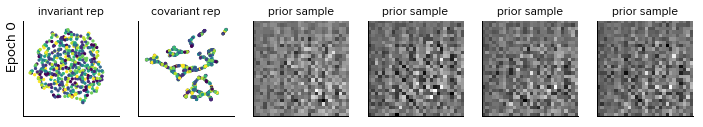

Optimising parameters for this epoch...
Epoch 0 took 18.57 minutes


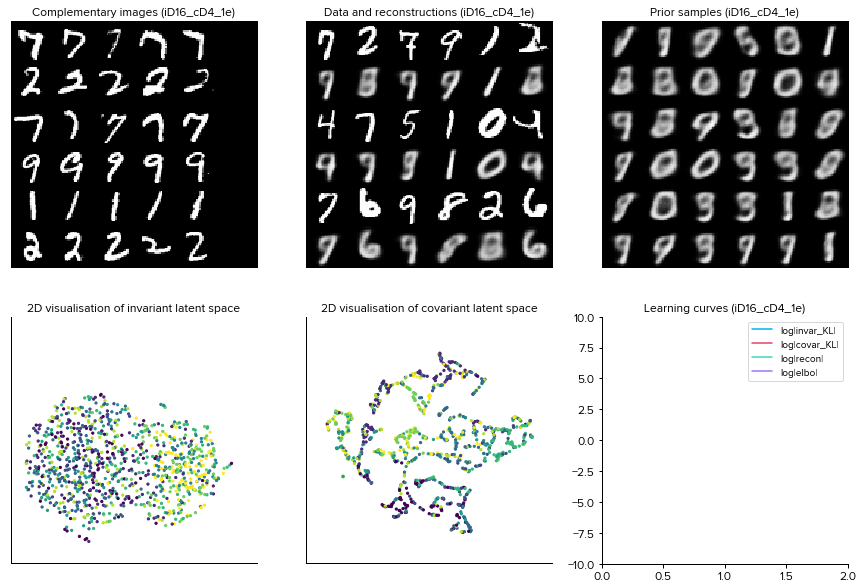


Overall training took 18.90 minutes


In [26]:
run_name = "iD16_cD4_1e"
sess = tf.Session()
invar_KL, covar_KL, rec, elbo = VAE.train_model(sess, 
                                                run_name,
                                                beta_params=[1.,1.], 
                                                n_epochs=1)

In [27]:
feed = {VAE.data: test_images, VAE.data_complement: test_comp_images, VAE.beta: [1.,1.]}

In [28]:
invar_rep, covar_rep, samples = sess.run([VAE.invar_rep, VAE.covar_rep, VAE.samples], feed)

## Main model building code

In [97]:
tf.reset_default_graph()        
data = tf.placeholder(tf.float32, [None, 28, 28])
data_complement = tf.placeholder(tf.float32, [None, None, 28, 28])

make_invar_prior = tf.make_template('invar_prior', make_invar_prior)
make_covar_prior = tf.make_template('covar_prior', make_covar_prior)
make_invar_posterior = tf.make_template('invar_posterior', make_invar_posterior)
make_covar_posterior = tf.make_template('covar_posterior', make_covar_posterior)
make_gen_model = tf.make_template('gen_model', make_gen_model)

# Define the model.
invar_prior = make_invar_prior(invar_rep_size=invar_rep_size)
covar_prior = make_covar_prior(covar_rep_size=covar_rep_size)

invar_posterior = make_invar_posterior(data_complement, invar_rep_size=invar_rep_size)
invar_rep = invar_posterior.sample()

covar_posterior = make_covar_posterior(data, covar_rep_size=covar_rep_size)
covar_rep = covar_posterior.sample()

#samples = make_gen_model(invar_prior.sample((10,1)), covar_prior.sample((10,1)), [28, 28]).mean()

invar_rep = invar_prior.sample((10,1))
covar_rep = covar_prior.sample((10,1))

invar_rep = tf.reshape(invar_rep, shape=[-1, invar_rep_size])
covar_rep = tf.reshape(covar_rep, shape=[-1, covar_rep_size])

derived_invar_rep = tf.layers.dense(invar_rep, 32, activation=tf.nn.relu)
derived_covar_rep = tf.layers.dense(covar_rep, 16, activation=tf.nn.relu)
x = tf.concat([derived_invar_rep, derived_covar_rep], axis=1)
x = tf.layers.dense(x, 64, activation=tf.nn.relu)
x = tf.reshape(x, [-1] + [2,2,16])
x = tf.layers.conv2d_transpose(
    x, filters=64, kernel_size=(5,5), strides=(2,2), 
    padding='same', activation=tf.nn.relu
    )
x = tf.layers.conv2d_transpose(
    x, filters=32, kernel_size=(5,5), strides=(2,2), 
    padding='same', activation=tf.nn.relu
    )
x = tf.layers.conv2d_transpose(
    x, filters=16, kernel_size=(5,5), strides=(2,2), 
    padding='same', activation=tf.nn.relu
    )
x = tf.layers.conv2d_transpose(
    x, filters=8, kernel_size=(5,5), strides=(2,2), 
    padding='same', activation=tf.nn.relu
    )
x = tf.layers.conv2d(
    x, filters=1, kernel_size=(5,5), strides=(1,1), 
    padding='valid', activation=None
    )            
logit = tf.reshape(x, [-1] + [28,28])

In [98]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

feed = {data: test_images, data_complement: test_comp_images}

print(sess.run(invar_rep, feed).shape)
print(sess.run(covar_rep, feed).shape)
print(sess.run(derived_invar_rep, feed).shape)
print(sess.run(derived_covar_rep, feed).shape)
print(sess.run(x, feed).shape)
print(sess.run(logit, feed).shape)

(10, 16)
(10, 4)
(10, 32)
(10, 16)
(10, 28, 28, 1)
(10, 28, 28)


## Generative model code

In [35]:
tf.reset_default_graph()        

data = tf.placeholder(tf.float32, [None, 28, 28])
data_complement = tf.placeholder(tf.float32, [None, None, 28, 28])
invar_rep_T = tf.placeholder(tf.float32, [None, invar_rep_size])
covar_rep_T = tf.placeholder(tf.float32, [None, covar_rep_size])

data_shape = [28, 28]

derived_invar_rep = tf.layers.dense(invar_rep_T, 32, activation=tf.nn.relu)
derived_covar_rep = tf.layers.dense(covar_rep_T, 16, activation=tf.nn.relu)
h1 = tf.concat([derived_invar_rep, derived_covar_rep], axis=1)
h2 = tf.layers.dense(h1, 64, activation=tf.nn.relu)
h3 = tf.reshape(h2, [-1] + [2,2,16])
h4 = tf.layers.conv2d_transpose(
    h3, filters=64, kernel_size=(5,5), strides=(2,2), 
    padding='same', activation=tf.nn.relu
    )
h5 = tf.layers.conv2d_transpose(
    h4, filters=32, kernel_size=(5,5), strides=(2,2), 
    padding='same', activation=tf.nn.relu
    )
h6 = tf.layers.conv2d_transpose(
    h5, filters=16, kernel_size=(5,5), strides=(2,2), 
    padding='same', activation=tf.nn.relu
    )
h7 = tf.layers.conv2d_transpose(
    h6, filters=8, kernel_size=(5,5), strides=(2,2), 
    padding='same', activation=tf.nn.relu
    )
h8 = tf.layers.conv2d(
    h7, filters=1, kernel_size=(5,5), strides=(1,1), 
    padding='valid', activation=None
    )            
logit = tf.reshape(h8, [-1] + data_shape)

total_params = np.sum([np.prod(v.get_shape().as_list()) for v in tf.trainable_variables()])
print('Built VAE using a total of {:,} parameters'.format(total_params))

Built VAE using a total of 241,025 parameters


In [36]:
feed = {data: test_images, data_complement: test_comp_images, invar_rep_T: invar_rep, covar_rep_T: covar_rep}

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(invar_rep_T, feed).shape)
print(sess.run(covar_rep_T, feed).shape)
print(sess.run(derived_invar_rep, feed).shape)
print(sess.run(derived_covar_rep, feed).shape)
print(sess.run(h1, feed).shape)
print(sess.run(h2, feed).shape)
print(sess.run(h3, feed).shape)
print(sess.run(h4, feed).shape)
print(sess.run(h5, feed).shape)
print(sess.run(h6, feed).shape)
print(sess.run(h7, feed).shape)
print(sess.run(h8, feed).shape)
print(sess.run(logit, feed).shape)

(17, 16)
(17, 4)
(17, 32)
(17, 16)
(17, 48)
(17, 64)
(17, 2, 2, 16)
(17, 4, 4, 64)
(17, 8, 8, 32)
(17, 16, 16, 160)
(17, 32, 32, 8)
(17, 28, 28, 1)
(17, 28, 28)


## Invariant posterior

In [38]:
tf.reset_default_graph()        

data = tf.placeholder(tf.float32, [None, 28, 28])
data_complement = tf.placeholder(tf.float32, [None, None, 28, 28])
invar_rep_T = tf.placeholder(tf.float32, [None, invar_rep_size])
covar_rep_T = tf.placeholder(tf.float32, [None, covar_rep_size])

data_shape = tf.shape(data_complement)

x = tf.reshape(data_complement, shape=[-1, data_shape[2], data_shape[3], 1])
h1 = tf.layers.conv2d(
    x, filters=8, kernel_size=(5,5), strides=(1,1),
    padding='valid', activation=tf.nn.relu
    )
h2 = tf.layers.conv2d(
    h1, filters=16, kernel_size=(5,5), strides=(2,2),
    padding='same', activation=tf.nn.relu
    )
h3 = tf.layers.conv2d(
    h2, filters=32, kernel_size=(5,5), strides=(2,2),
    padding='same', activation=tf.nn.relu
    )
h4 = tf.layers.conv2d(
    h3, filters=64, kernel_size=(5,5), strides=(2,2),
    padding='same', activation=tf.nn.relu
    )
h5 = tf.layers.conv2d(
    h4, filters=64, kernel_size=(5,5), strides=(2,2),
    padding='same', activation=tf.nn.relu
    )
h6 = tf.reshape(h5, shape=[-1, 256])
h7 = tf.layers.dense(h6, 128, activation=tf.nn.relu)
h8 = tf.reshape(h7, shape=[data_shape[0], data_shape[1], 128])
h9 = tf.reduce_sum(h8, axis = 1)
loc = tf.layers.dense(h9, invar_rep_size, activation=None)
scale = tf.layers.dense(h9, invar_rep_size, activation=tf.nn.softplus)


In [42]:
feed = {data: test_images, data_complement: test_comp_images, invar_rep_T: invar_rep, covar_rep_T: covar_rep}

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(x, feed).shape)
print(sess.run(h1, feed).shape)
print(sess.run(h2, feed).shape)
print(sess.run(h3, feed).shape)
print(sess.run(h4, feed).shape)
print(sess.run(h5, feed).shape)
print(sess.run(h6, feed).shape)
print("h7: {}".format(sess.run(h7, feed).shape))
print("h8: {}".format(sess.run(h8, feed).shape))
print("h9: {}".format(sess.run(h9, feed).shape))
print("loc: {}".format(sess.run(loc, feed).shape))
print("scale: {}".format(sess.run(scale, feed).shape))

(85, 28, 28, 1)
(85, 24, 24, 8)
(85, 12, 12, 16)
(85, 6, 6, 32)
(85, 3, 3, 64)
(85, 2, 2, 64)
(85, 256)
h7: (85, 128)
h8: (17, 5, 128)
h9: (17, 128)
loc: (17, 16)
scale: (17, 16)
